# Heart Disease Classifier

## Goal

Classify wether a person has or hasn't Heart Disease trough logarithmic regression

## Data

We will use the [Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) Set from the UCI Machine Learning Repository. Comes from the Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual.

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: place of study
- **sex**: Male/Female
- **c:** chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]
- **trestbp**: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: serum cholesterol in mg/dl
- **fbs**: if fasting blood sugar > 120 mg/dl
- **restecg**: resting electrocardiographic results
  - Values: [normal, stt abnormality, lv hypertrophy]
- **thalach**: maximum heart rate achieved
- **exang**: exercise-induced angina (True/ False)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
- **ca**: number of major vessels (0-3) colored by fluoroscopy
- **thal**: [normal; fixed defect; reversible defect]
- **num**: the predicted attribute

## Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Model Development

### Load data

In [3]:
hrt = pd.read_csv('data/Heart Disease Data.csv')

### EDA

In [4]:
hrt.shape

(920, 16)

In [5]:
hrt.isna().sum() / hrt.shape[0] * 100.0

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [6]:
hrt.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


#### Observations

- It has missing data, we will deal with it by dropping those observations. We will drop ca and thal features first.
- The age is between 28 and 77 yo the median being 54
- 79% of the observations are males
- We need to clean the num feature, let's consider

### Feature Engineering I

In [7]:
hrt.drop(['ca', 'thal'], axis=1, inplace=True)

In [8]:
hrt.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [9]:
hrt.dropna(inplace=True)

In [10]:
hrt.shape

(531, 14)

In [11]:
hrt.isna().sum() / hrt.shape[0] * 100.0

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
num         0.0
dtype: float64

We removed the features and observations, we are left with 531 out of 920 we started with. We have no longer missing data.

### Feature Engineering II

In [12]:
hrt['num'].value_counts()

num
0    207
1    161
2     71
3     71
4     21
Name: count, dtype: int64

In [13]:
hrt['num'] = hrt['num'].apply(lambda x: 1 if x > 0 else 0)

In [14]:
hrt['num'].value_counts()

num
1    324
0    207
Name: count, dtype: int64

After cleaning the target colum we end up with a binary feature

### Feature selection

Let's find out numerical data with strong correlations and categorical features with different means within its categories

In [15]:
hrt_num = list(hrt.select_dtypes(['number']).columns.drop('id'))

In [16]:
hrt[hrt_num].corr().abs()['num'].sort_values(ascending=False)

num         1.000000
thalch      0.442717
oldpeak     0.356444
age         0.175486
chol        0.163128
trestbps    0.154891
Name: num, dtype: float64

There are two promising features: thalch and oldpeak

In [17]:
selected_hrt_num = ['thalch', 'oldpeak']

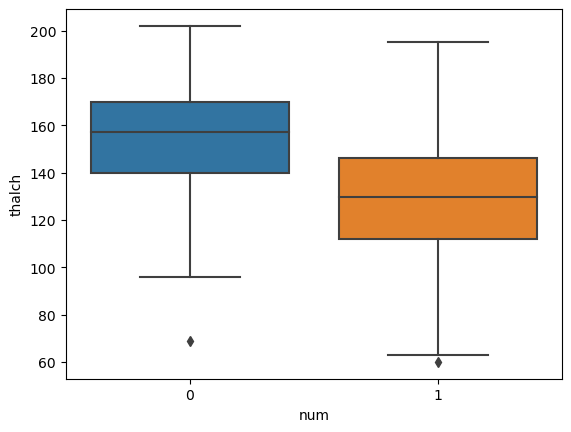

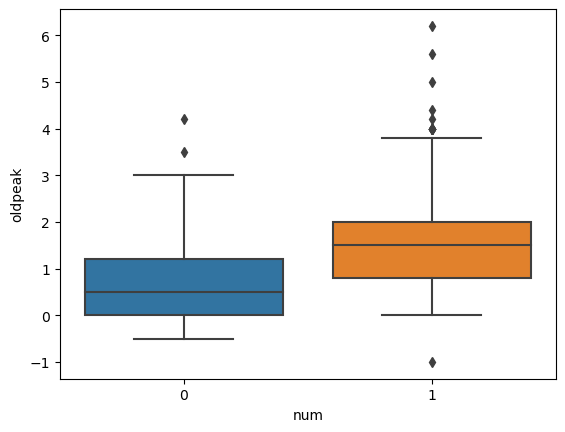

In [18]:
for column in selected_hrt_num:
    
    sns.boxplot(x='num', y=column, data=hrt)
    plt.show()

Now lets explore the categorical features

In [19]:
hrt_cat = list(hrt.select_dtypes(include=['object']).columns)
hrt_cat

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope']

In [23]:
for column in hrt_cat:

    print( pd.crosstab(hrt['num'], hrt[column]) / hrt.shape[0] * 100.0)
    print('\n')


sex     Female       Male
num                      
0    16.384181  22.598870
1     7.532957  53.483992


dataset  Cleveland    Hungary  Switzerland  VA Long Beach
num                                                      
0        30.885122   5.084746     0.188324       2.824859
1        26.177024  12.806026     8.474576      13.559322


cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0       10.922787         9.604520    15.065913        3.389831
1       48.775895         3.578154     6.403013        2.259887


fbs      False      True 
num                      
0    33.521657   5.461394
1    50.470810  10.546139


restecg  lv hypertrophy     normal  st-t abnormality
num                                                 
0             13.370998  23.163842          2.448211
1             16.949153  32.768362         11.299435


exang      False      True 
num                        
0      30.696798   8.28625

sex, cp, restecg are features that look promising. For example for restecg, in the 'normal' level we see a big difference between the 0 and 1 class, 14.3 and 44.0 respectively

In [24]:
selected_hrt_cat = ['sex','cp''restecg']

Now we have a set of numerical and categorical features to work with. Now lets encode the categorical features according to its type and scale the numerical features